Churn rate, also known as customer attrition rate, refers to the percentage of customers who stop using a company's products or services during a specific time period. It is a key metric used by businesses to measure customer retention and the effectiveness of their customer engagement and satisfaction strategies.

A high churn rate indicates that a company is losing customers quickly, which can be a sign of dissatisfaction with the product or service, poor customer service, or better offerings from competitors. Conversely, a low churn rate suggests that customers are satisfied and loyal, leading to steady or growing customer retention. Reducing churn rate is often a primary goal for businesses aiming to improve profitability and growth.

# **Objectives**

Predict Customer Churn: Accurately classify customers as likely to churn or not using an ANN model.
Identify Key Factors: Determine which factors significantly influence customer churn.
Improve Customer Retention: Implement strategies to retain at-risk customers based on predictions.
Optimize Resource Allocation: Focus efforts and resources on high-risk customers to maximize retention.
Enhance Business Strategies: Use insights to refine business strategies and reduce churn rate.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv('/content/Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data.shape

(10000, 14)

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


RowNumber: Index of the row in the dataset. It does not influence the target variable.

CustomerId: Unique identifier for the customer. It does not influence the target variable directly, but it is essential for identifying each record.

Surname: Customer's last name. It generally does not influence the target variable but might be useful for demographic analysis or personalized services.

CreditScore: A numerical representation of the customer's creditworthiness. Higher credit scores usually indicate better financial behavior and lower risk of churn.

Geography: The country where the customer resides (e.g., France, Spain). Customer location might influence churn due to regional economic conditions, competition, or service availability.

Gender: The customer's gender (Male/Female). Gender may influence churn due to differing financial behaviors and preferences.

Age: The age of the customer. Different age groups might have varying levels of financial stability and service needs, influencing churn rates.

Tenure: The number of years the customer has been with the bank. Longer tenure often indicates customer loyalty, reducing the likelihood of churn.

Balance: The amount of money the customer has in their account. Customers with higher balances may have more engagement with the bank, reducing churn likelihood.

NumOfProducts: The number of products the customer has with the bank. Customers with multiple products are generally more engaged and less likely to churn.

HasCrCard: Indicates whether the customer has a credit card (1) or not (0). Having a credit card might indicate deeper engagement with the bank's services.

IsActiveMember: Indicates whether the customer is an active member (1) or not (0). Active members are likely more engaged and less prone to churn.

EstimatedSalary: The estimated annual salary of the customer. Higher salaries might correlate with more financial stability and lower churn risk.

Exited: The target variable indicating whether the customer has churned (1) or not (0).

In [ ]:
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [ ]:
data.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)
df[['Geography_Germany', 'Geography_Spain', 'Gender_Male']] = df[['Geography_Germany', 'Geography_Spain', 'Gender_Male']].astype(int)
df.head(3)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0


One-Hot Encoding

One-hot encoding is a technique to convert categorical variables into a form that can be provided to machine learning algorithms to improve predictions. Each category of the variable is converted into a new binary column (0 or 1).

If Gender_Male is 0, it means the customer is female.

If both Geography_Spain and Geography_Germany are 0, it means the customer is from France.

In [ ]:
x=df.drop(columns=['Exited'])
y=df['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=108)

In [ ]:
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train=scaler.fit_transform(train_x)
X_test=scaler.transform(test_x)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

There will be:

1 input layer

1 hidden layer ==> will put 3 nodes/perceptron in hidden layer

1 output layer

In [ ]:
model=Sequential()

#input layer
model.add(Dense(3,activation='sigmoid',input_dim=11))

#output layer
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **Model compilation stage**

Decide which loss function to use

Decide which optimizer to use for Gradean Descent

In [ ]:
#binary_crossentropy or can say log loss
model.compile(loss='binary_crossentropy',optimizer='Adam')

In [ ]:
hist = model.fit(X_train, train_y,epochs=10)

Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 1.1059
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.8216
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 0.6686
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 0.5880
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.5456
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.5231
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 0.5095
Epoch 8/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4994
Epoch 9/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4900
Epoch 10/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4805


In [ ]:
hist.history

{'loss': [1.1058954000473022,
  0.8216304779052734,
  0.6685804724693298,
  0.5880222916603088,
  0.5456345677375793,
  0.5230576992034912,
  0.5095243453979492,
  0.49936097860336304,
  0.48997747898101807,
  0.48046353459358215]}

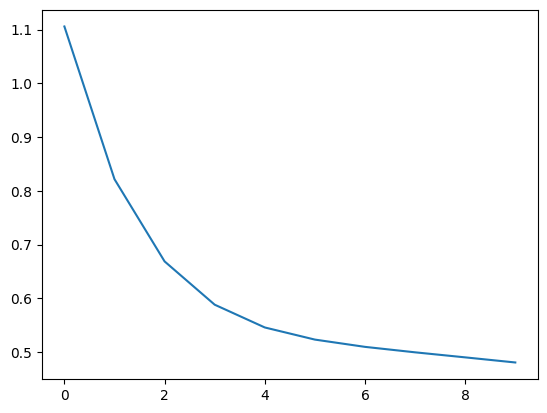

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.show()

Here we have all Weights and Biases of our model

Lets check all Weights and Biases of model now

In [ ]:
#weights and biasee for layer 0
model.layers[0].get_weights()

[array([[-0.20900999,  0.058113  , -0.17380396],
        [ 0.73052096, -0.01933062,  1.0306135 ],
        [-0.2237255 , -0.30323058,  0.02970288],
        [ 0.56175655, -0.32584172,  0.3550593 ],
        [-0.09515586,  0.20204659,  0.00304374],
        [ 0.12855707,  0.18030593, -0.09743527],
        [ 0.07720986,  0.835883  , -0.8540252 ],
        [ 0.3361205 , -0.07680851, -0.1759338 ],
        [ 1.003058  , -0.7122571 ,  0.32258797],
        [ 0.22659878,  0.4834827 , -0.14092235],
        [ 0.09042276,  0.6234973 , -0.6217861 ]], dtype=float32),
 array([-0.6041811 , -0.22275463, -0.7791082 ], dtype=float32)]

In [ ]:
#weights and biasee for layer 1
model.layers[1].get_weights()

[array([[ 0.11710107],
        [-0.4431202 ],
        [ 0.4425495 ]], dtype=float32),
 array([-1.2272265], dtype=float32)]

In [ ]:
#predictions
model.predict(X_test)

63/63 [==============================] - 0s 3ms/step


array([[0.23570372],
       [0.19486879],
       [0.20974252],
       ...,
       [0.1930051 ],
       [0.2547763 ],
       [0.18426211]], dtype=float32)

We are using sigmoid and this output is thats why in prob not classes
To find exact threshold we use AUC-ROC curve but for now say 5

In [ ]:
#output in classes now
y_pred = np.where(model.predict(X_test)>0.5,1,0)
y_pred

63/63 [==============================] - 0s 3ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(test_y,y_pred)

0.787

How to change ANN Architecture for more accuracy improvement
This can be improved by:

Hidden layer activation fucntion to ReLue
Increase Epoch to 1000
Increase number of nodes in Hidden layer say 8 or 10
Increase number of Hidden Layers ==> can lead to overfitting

In [ ]:
model = Sequential()

#input layer
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
#output layer
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dense_5 (Dense)             (None, 11)                132       
                                                                 
 dense_6 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#binary_crossentropy or can say log loss
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

hist_ = model.fit(X_train, train_y,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 5s 6ms/step - loss: 0.5556 - accuracy: 0.7331 - val_loss: 0.4598 - val_accuracy: 0.8025
Epoch 2/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4478 - accuracy: 0.8016 - val_loss: 0.4294 - val_accuracy: 0.8119
Epoch 3/100
200/200 [==============================] - 1s 6ms/step - loss: 0.4243 - accuracy: 0.8125 - val_loss: 0.4206 - val_accuracy: 0.8125
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4093 - accuracy: 0.8213 - val_loss: 0.4089 - val_accuracy: 0.8144
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3937 - accuracy: 0.8319 - val_loss: 0.3979 - val_accuracy: 0.8219
Epoch 6/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3806 - accuracy: 0.8395 - val_loss: 0.3865 - val_accuracy: 0.8294
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3696 - accuracy: 0.8456 - val_loss: 0.3773 - val_accuracy: 0.8344

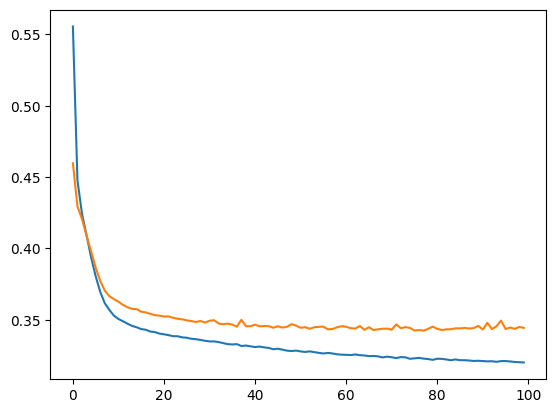

In [ ]:
plt.plot(hist_.history['loss'])
plt.plot(hist_.history['val_loss'])
plt.show()

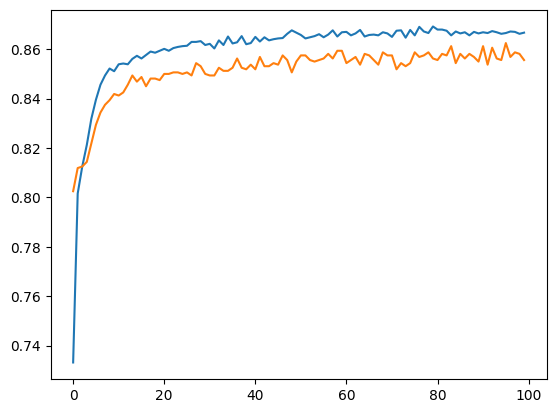

In [ ]:
plt.plot(hist_.history['accuracy'])
plt.plot(hist_.history['val_accuracy'])
plt.show()

Overfitting

Regularization

Dropout can be used

In [ ]:
#output in classes now
y_pred = np.where(model.predict(X_test)>0.5,1,0)

63/63 [==============================] - 0s 2ms/step


In [ ]:
accuracy_score(test_y,y_pred)

0.859